In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)
import numpy as np
import seaborn as sns

# EDA
## Load Data

In [2]:
Badges = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Badges.csv')
Comments = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Comments.csv')
PostHistory = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/PostHistory.csv')
Postlinks = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Postlinks.csv')
Posts = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Posts.csv')
Users = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Users.csv')
Votes = pd.read_csv('/Users/esmondchu/Dropbox/160-Stackoverflow-Data/100000_rows_[168_MB]/Votes.csv')

## Check NA of Posts

Text(0.5,1,'Posts NA')

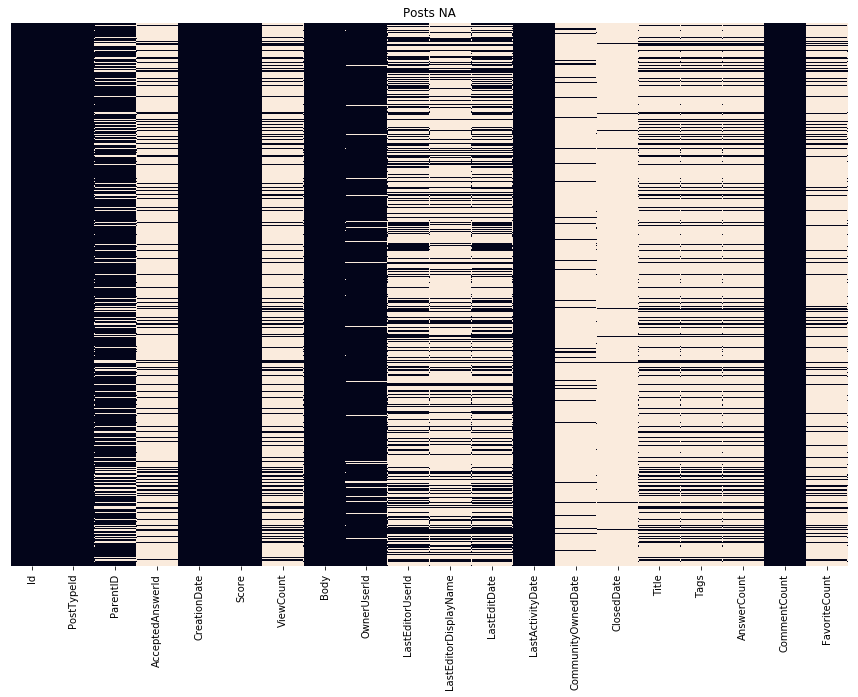

In [3]:
sns.heatmap(Posts.isnull(), yticklabels=False, cbar=False)
plt.title('Posts NA')

In [4]:
Posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
Id                       100000 non-null int64
PostTypeId               100000 non-null int64
ParentID                 81053 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             100000 non-null object
Score                    100000 non-null int64
ViewCount                18947 non-null float64
Body                     100000 non-null object
OwnerUserId              96210 non-null float64
LastEditorUserId         35095 non-null float64
LastEditorDisplayName    21143 non-null object
LastEditDate             35478 non-null object
LastActivityDate         100000 non-null object
CommunityOwnedDate       5502 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             100000 non-n

# Timely Collaboration and Values
## Answers Posts

In [5]:
import datetime
import calendar

#date to timestamp
def date_ts(s):
    """ 
    param s: str - date
    returns: int - timestamp
    """
    date = datetime.datetime.strptime(s, "%Y-%m-%dT%H:%M:%S")
    st = calendar.timegm(date.utctimetuple())
    return(st)

In [6]:
df_answers = Posts[Posts.PostTypeId == 2]

In [7]:
df_answers = df_answers.reset_index(drop=True)

In [8]:
df_answers.CreationDate = df_answers.CreationDate.str[:-4]

In [9]:
unix_ans = [date_ts(i) for i in df_answers.CreationDate]

In [10]:
df_answers_time = pd.DataFrame({'ParentID':df_answers.ParentID, 'Cr_time':unix_ans})

In [11]:
df_list = df_answers_time.groupby(df_answers_time.ParentID)

In [12]:
uni_par_id = list(df_answers_time.ParentID.unique())

In [13]:
ans_date = [list(df_list.get_group(i).Cr_time) for i in uni_par_id]

In [14]:
yes = 0
no = 0
for i in ans_date:
    if len(i) == 1:
        yes += 1
    else:
        no += 1
print(yes, no)

#there are 2917 posts with only 1 answer, 15773 posts with more than 1 answers.

2917 15773


In [15]:
#set 1-answer post sd to 0
for i in ans_date:
    if len(i) == 1:
        i.append(i[0])
    else:
        i == i

In [16]:
import statistics
ans_time_sd = [statistics.stdev(i) for i in ans_date]

In [17]:
post_Id = sorted(list(df_answers.ParentID.unique()))

In [18]:
post_ans_sd = pd.DataFrame({'post_Id':post_Id, 'time_sd':ans_time_sd})

In [19]:
post_ans_sd.head()

post_Id       time_sd
0      4.0  1.724331e+06
1      6.0  1.628865e+06
2      9.0  2.005625e+06
3     11.0  1.567259e+06
4     13.0  9.701637e+05

## Parents Posts

In [20]:
Parents_post = Posts[Posts.PostTypeId == 1]

In [21]:
Parents_post = Parents_post.reset_index(drop=True)

In [22]:
Parents_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18947 entries, 0 to 18946
Data columns (total 20 columns):
Id                       18947 non-null int64
PostTypeId               18947 non-null int64
ParentID                 0 non-null float64
AcceptedAnswerId         15069 non-null float64
CreationDate             18947 non-null object
Score                    18947 non-null int64
ViewCount                18947 non-null float64
Body                     18947 non-null object
OwnerUserId              17701 non-null float64
LastEditorUserId         14223 non-null float64
LastEditorDisplayName    9820 non-null object
LastEditDate             14381 non-null object
LastActivityDate         18947 non-null object
CommunityOwnedDate       715 non-null object
ClosedDate               2047 non-null object
Title                    18947 non-null object
Tags                     18947 non-null object
AnswerCount              18947 non-null float64
CommentCount             18947 non-null int64
Favo

In [23]:
df_parents = pd.DataFrame({'post_Id':Parents_post.Id, 'Views_count':Parents_post.ViewCount,\
                           'Score':Parents_post.Score, 'Comment_count':Parents_post.CommentCount})

In [24]:
df_comb = df_parents.join(post_ans_sd.set_index('post_Id'), on='post_Id')

In [25]:
df_comb.head()

Comment_count  Score  Views_count post_Id       time_sd
0              1    543      34799.0       4  1.724331e+06
1              0    241      15696.0       6  1.628865e+06
2             16   1716     439828.0       9  2.005625e+06
3              3   1286     130055.0      11  1.567259e+06
4              6    519     149911.0      13  9.701637e+05

## Plots

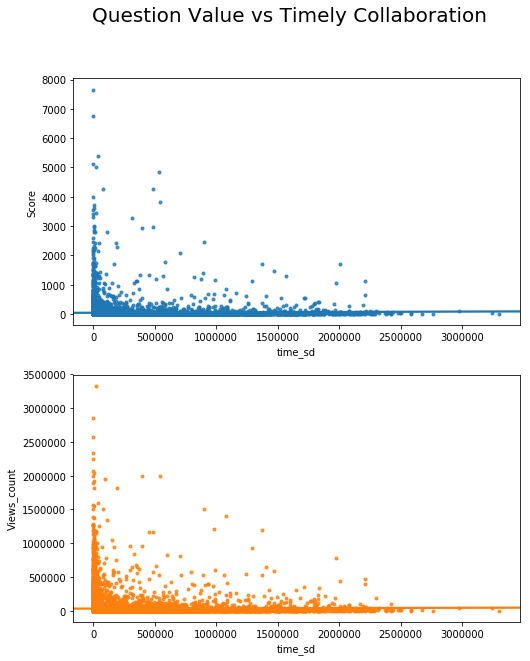

In [26]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, df_comb.Score, marker=".", ax=ax1)
sns.regplot(df_comb.time_sd, df_comb.Views_count, marker=".", ax=ax2)

## Data transformation

In [27]:
df_comb.head()

Comment_count  Score  Views_count post_Id       time_sd
0              1    543      34799.0       4  1.724331e+06
1              0    241      15696.0       6  1.628865e+06
2             16   1716     439828.0       9  2.005625e+06
3              3   1286     130055.0      11  1.567259e+06
4              6    519     149911.0      13  9.701637e+05

In [28]:
df_comb.Views_count.describe()

count    1.894700e+04
mean     3.093298e+04
std      1.129652e+05
min      5.900000e+01
25%      1.401500e+03
50%      4.288000e+03
75%      1.628700e+04
max      3.328490e+06
Name: Views_count, dtype: float64

In [29]:
df_comb.Score.describe()

count    18947.000000
mean        42.317306
std        201.475094
min         -7.000000
25%          2.000000
50%          6.000000
75%         19.000000
max       7658.000000
Name: Score, dtype: float64

In [30]:
import math
def loga(x):
    val = x+9
    out = 1/math.log10(val)
    return(out)

In [31]:
View_log = df_comb.Views_count.apply(loga)

In [32]:
Scores_log = df_comb.Score.apply(loga)

In [33]:
yes = 0
no = 0
for i in df_comb.Score:
    if i < 0:
        yes += 1
    else:
        no += 1
print(yes, no)

102 18845


## Plot of Transformed Data

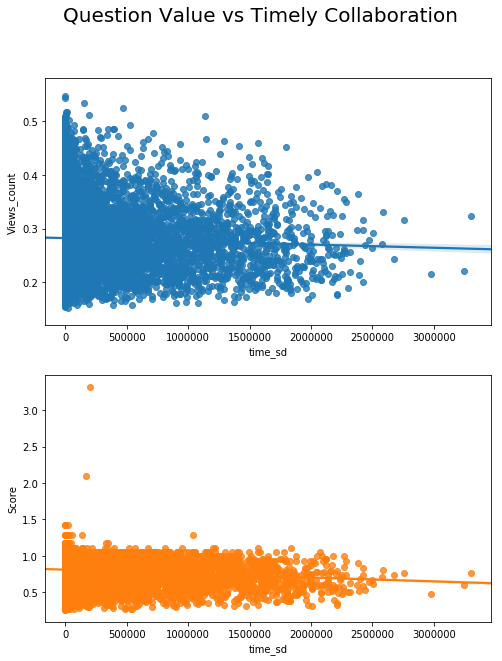

In [34]:
f, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8,10))
plt.suptitle("Question Value vs Timely Collaboration", size=20)
sns.regplot(df_comb.time_sd, View_log, ax=ax1)
sns.regplot(df_comb.time_sd, Scores_log, ax=ax2)

# Probability of a question being answered as a function of time in minutes
eg. $P(\text{question is answered}|t=0,...,n , n=1,...,1440)$ for 

## Parents Post Data Wrangling

In [35]:
#Parents_post
df_answers

Id  PostTypeId  ParentID  AcceptedAnswerId         CreationDate  \
0           7           2       4.0               NaN  2008-07-31T22:17:57   
1          12           2      11.0               NaN  2008-07-31T23:56:41   
2          18           2      17.0               NaN  2008-08-01T05:12:44   
3          21           2       9.0               NaN  2008-08-01T08:57:27   
4          22           2       9.0               NaN  2008-08-01T12:07:19   
5          26           2      17.0               NaN  2008-08-01T12:16:22   
6          27           2      11.0               NaN  2008-08-01T12:17:19   
7          29           2      13.0               NaN  2008-08-01T12:19:17   
8          30           2      25.0               NaN  2008-08-01T12:22:40   
9          31           2       6.0               NaN  2008-08-01T12:22:51   
10         33           2      14.0               NaN  2008-08-01T12:26:39   
11         44           2      39.0               NaN  2008-08-01T12:55:42   
12         45           2      39.0               NaN  2008-08-01T12:56:37   
13         49           2      24.0               NaN  2008-08-01T13:02:51   
14         51           2      36.0               NaN  2008-08-01T13:07:52   
15         52           2      34.0               NaN  2008-08-01T13:08:59   
16         53           2      34.0               NaN  2008-08-01T13:08:59   
17         56           2      48.0               NaN  2008-08-01T13:10:16   
18         58           2      48.0               NaN  2008-08-01T13:14:30   
19         60           2      34.0               NaN  2008-08-01T13:14:40   
20         62           2      59.0               NaN  2008-08-01T13:18:37   
21         65           2      61.0               NaN  2008-08-01T13:20:44   
22         68           2      66.0               NaN  2008-08-01T13:22:04   
23         71           2      19.0               NaN  2008-08-01T13:37:59   
24         73           2      25.0               NaN  2008-08-01T13:40:16   
25         76           2      42.0               NaN  2008-08-01T13:44:35   
26         77           2      42.0               NaN  2008-08-01T13:46:00   
27         78           2       4.0               NaN  2008-08-01T13:53:06   
28         81           2      34.0               NaN  2008-08-01T14:03:22   
29         82           2      36.0               NaN  2008-08-01T14:06:28   
...       ...         ...       ...               ...                  ...   
81023  159838           2  142830.0               NaN  2008-10-01T21:27:25   
81024  159840           2   69546.0               NaN  2008-10-01T21:27:32   
81025  159841           2  159039.0               NaN  2008-10-01T21:27:50   
81026  159843           2  159625.0               NaN  2008-10-01T21:28:11   
81027  159844           2  135664.0               NaN  2008-10-01T21:28:21   
81028  159845           2   20034.0               NaN  2008-10-01T21:28:26   
81029  159847           2  159768.0               NaN  2008-10-01T21:29:16   
81030  159848           2  157770.0               NaN  2008-10-01T21:29:22   
81031  159850           2  159597.0               NaN  2008-10-01T21:29:36   
81032  159851           2  136752.0               NaN  2008-10-01T21:29:42   
81033  159854           2  159821.0               NaN  2008-10-01T21:30:07   
81034  159857           2  159797.0               NaN  2008-10-01T21:30:40   
81035  159858           2  159846.0               NaN  2008-10-01T21:31:13   
81036  159859           2  148729.0               NaN  2008-10-01T21:31:51   
81037  159860           2  159837.0               NaN  2008-10-01T21:32:15   
81038  159861           2  159837.0               NaN  2008-10-01T21:32:16   
81039  159863           2  159732.0               NaN  2008-10-01T21:32:43   
81040  159865           2  159842.0               NaN  2008-10-01T21:33:02   
81041  159866           2  159853.0               NaN  2008-10-01T21:33:44   
81042  159867           2  159862

In [36]:
df_answers_time.head()

Cr_time  ParentID
0  1217542677       4.0
1  1217548601      11.0
2  1217567564      17.0
3  1217581047       9.0
4  1217592439       9.0

In [37]:
parents_time = Parents_post.CreationDate.str[:-4]

In [38]:
unix_parents = [date_ts(i) for i in parents_time]

In [39]:
df_parents_time = pd.DataFrame({'Cr_time_parents':unix_parents, 'ParentID':Parents_post.Id})

In [40]:
df_parents_time.head()

Cr_time_parents  ParentID
0       1217540572         4
1       1217542088         6
2       1217547659         9
3       1217548537        11
4       1217551358        13

## Merge Table & Create Columns of mins and hours

In [41]:
df_compare = pd.merge(df_parents_time, df_answers_time, on='ParentID')

In [42]:
df_compare.head()

Cr_time_parents ParentID     Cr_time
0       1217540572        4  1217542677
1       1217540572        4  1217598786
2       1217540572        4  1217600608
3       1217540572        4  1217967510
4       1217540572        4  1218390867

In [43]:
df_compare['Duration'] = df_compare.Cr_time - df_compare.Cr_time_parents

In [44]:
df_compare['Duration_mins'] = df_compare.Duration/60

In [45]:
df_compare['Duration_hours'] = df_compare.Duration_mins/60

In [46]:
df_compare.head()

Cr_time_parents ParentID     Cr_time  Duration  Duration_mins  \
0       1217540572        4  1217542677      2105      35.083333   
1       1217540572        4  1217598786     58214     970.233333   
2       1217540572        4  1217600608     60036    1000.600000   
3       1217540572        4  1217967510    426938    7115.633333   
4       1217540572        4  1218390867    850295   14171.583333   

   Duration_hours  
0        0.584722  
1       16.170556  
2       16.676667  
3      118.593889  
4      236.193056

In [47]:
df_compare.Duration_mins.describe()

count    80995.000000
mean      2283.904162
std       8624.629899
min     -44770.133333
25%          7.183333
50%         23.300000
75%        185.325000
max      87521.316667
Name: Duration_mins, dtype: float64

In [48]:
df_compare.Duration_hours.describe()

count    80995.000000
mean        38.065069
std        143.743832
min       -746.168889
25%          0.119722
50%          0.388333
75%          3.088750
max       1458.688611
Name: Duration_hours, dtype: float64

In [49]:
neg = 0
pos = 0
for i in df_compare.Duration_hours:
    if i >= 0:
        pos += 1
    else:
        neg += 1
print(pos, neg)

#15 negative duration, possibly an error from collecting data
#ie. negative duration means answer being posted before the parents questions being posted (not possible)

80980 15


In [50]:
df_compare.head()

Cr_time_parents ParentID     Cr_time  Duration  Duration_mins  \
0       1217540572        4  1217542677      2105      35.083333   
1       1217540572        4  1217598786     58214     970.233333   
2       1217540572        4  1217600608     60036    1000.600000   
3       1217540572        4  1217967510    426938    7115.633333   
4       1217540572        4  1218390867    850295   14171.583333   

   Duration_hours  
0        0.584722  
1       16.170556  
2       16.676667  
3      118.593889  
4      236.193056

## Calculate Frequency and Probability of mins and hours

In [149]:
Duration_mins_rounded = df_compare.Duration_mins.round()

In [150]:
fre_mins = pd.DataFrame(Duration_mins_rounded.value_counts(), index=None)
fre_mins['mins'] = fre_mins.index
fre_mins = fre_mins.rename(columns={'Duration_mins':'Frequency','mins':'mins'})
fre_mins.reset_index(inplace=True, drop=True)
#drop negative mins
fre_mins.drop(fre_mins[fre_mins.mins < 0].index, inplace=True)
fre_mins = fre_mins.sort_values('mins')

In [151]:
fre_mins.head()

Frequency  mins
75        122   0.0
13       1178   1.0
3        3156   2.0
0        3704   3.0
1        3701   4.0

In [153]:
fre_mins['Probabiity'] = fre_mins.Frequency/sum(fre_mins.Frequency)

In [156]:
fre_mins.head()

Frequency  mins  Probabiity
75        122   0.0    0.001507
13       1178   1.0    0.014547
3        3156   2.0    0.038973
0        3704   3.0    0.045740
1        3701   4.0    0.045703

In [157]:
fre_mins.Probabiity.describe()

count    9831.000000
mean        0.000102
std         0.001244
min         0.000012
25%         0.000012
50%         0.000012
75%         0.000025
max         0.045740
Name: Probabiity, dtype: float64

## Plot (Probability)

Text(0.5,1,'Probability of Answered in terms of Minutes')

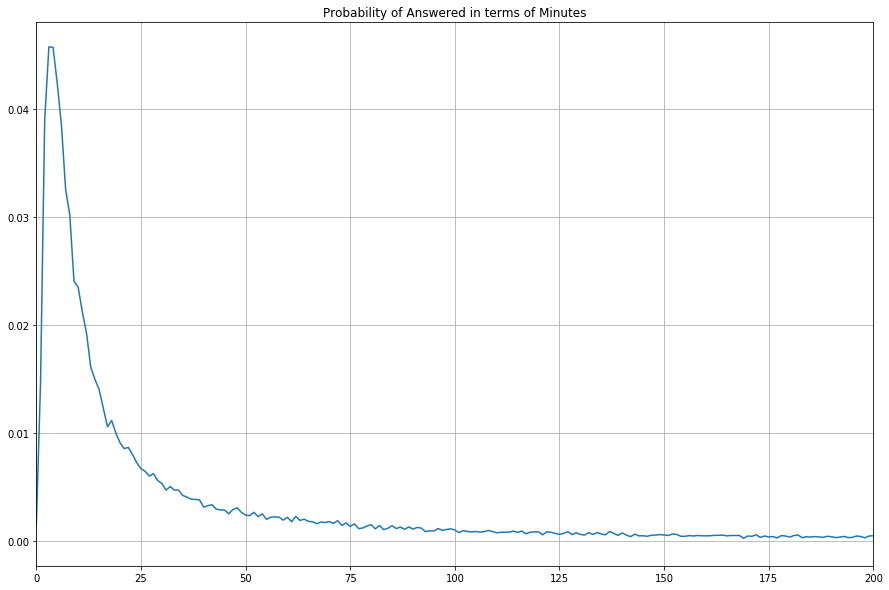

In [177]:
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,200)
plt.grid()
plt.title('Probability of Answered in terms of Minutes')

## Cumulative Probability 

In [159]:
fre_mins.head()

Frequency  mins  Probabiity
75        122   0.0    0.001507
13       1178   1.0    0.014547
3        3156   2.0    0.038973
0        3704   3.0    0.045740
1        3701   4.0    0.045703

In [160]:
fre_mins['cum_pro'] = np.cumsum(list(fre_mins.Probabiity))

In [163]:
fre_mins.head()

Frequency  mins  Probabiity   cum_pro
75        122   0.0    0.001507  0.001507
13       1178   1.0    0.014547  0.016053
3        3156   2.0    0.038973  0.055026
0        3704   3.0    0.045740  0.100766
1        3701   4.0    0.045703  0.146468

Text(0.5,0,'cumulative probability')

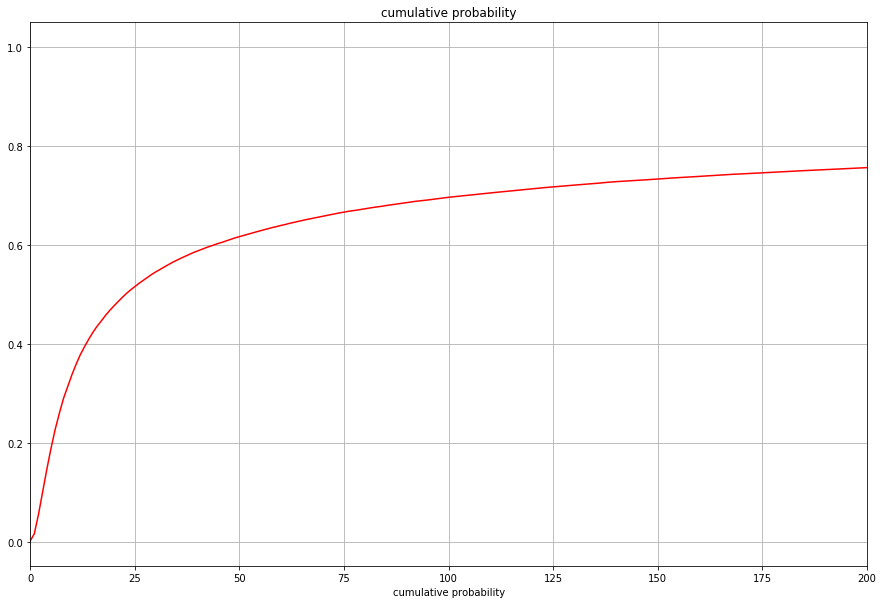

In [173]:
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,200)
plt.grid()
plt.title('cumulative probability')
plt.xlabel('cumulative probability')

## Summary of Probability Plots

Text(0.5,0,'cumulative probability')

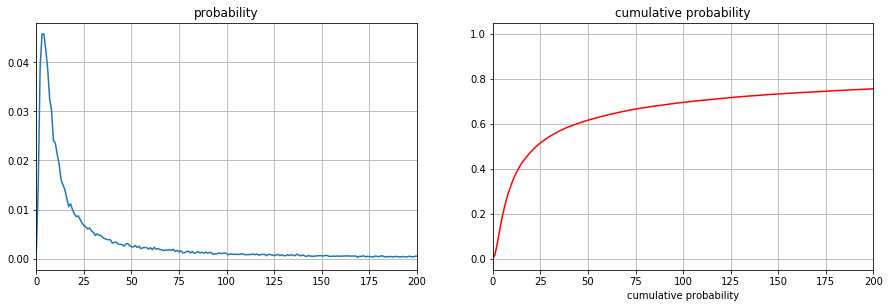

In [176]:
plt.subplot(221)
plt.plot(fre_mins.mins, fre_mins.Probabiity)
plt.xlim(0,200)
plt.grid()
plt.title('probability')
plt.subplot(222)
plt.plot(fre_mins.mins, fre_mins.cum_pro, color='red')
plt.xlim(0,200)
plt.grid()
plt.title('cumulative probability')
plt.xlabel('cumulative probability')